# Agent Performance Analysis

This notebook analyzes the performance of three agents (Beginner, Normal, Expert) based on the CSV logs generated by the Unity simulation.

It visualizes:
- Difficulty Progression
- Performance Metrics (Attempts, Backtracks, NearSolves, Resets, TimeTaken)
- Genetic Algorithm Stats (GATime, BestFitness)

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Set plot style
plt.style.use('ggplot')

# Define file paths
base_path = r"e:\MyData\MyGames\Metaheuristic-Final\Assets\Datas"
files = {
    "Beginner": os.path.join(base_path, "map_records_BeginnerAgent.csv"),
    "Normal": os.path.join(base_path, "map_records_NormalAgent.csv"),
    "Expert": os.path.join(base_path, "map_records_ExpertAgent.csv"),
    "Beginner-Time": os.path.join(base_path, "map_records_BeginnerAgent_onlytime.csv"),
    "Normal-Time": os.path.join(base_path, "map_records_NormalAgent_onlytime.csv"),
    "Expert-Time": os.path.join(base_path, "map_records_ExpertAgent_onlytime.csv"),
    "Beginner-NoModel": os.path.join(base_path, "map_records_BeginnerAgent_nomodel.csv"),
    "Normal-NoModel": os.path.join(base_path, "map_records_NormalAgent_nomodel.csv"),
    "Expert-NoModel": os.path.join(base_path, "map_records_ExpertAgent_nomodel.csv")
}

def load_agent_data(filepath):
    if not os.path.exists(filepath):
        print(f"File not found: {filepath}")
        return None
    
    # Read CSV, skipping lines that start with '#' (map data)
    # We can use comment='#' in read_csv, but our map data lines start with '# '
    # The header is standard CSV, so comment='#' should work fine if the map lines start with #
    try:
        df = pd.read_csv(filepath, comment='#')
        return df
    except Exception as e:
        print(f"Error reading {filepath}: {e}")
        return None

data = {}
df_standard = {}
for name, path in files.items():
    df = load_agent_data(path)
    if df is not None:
        data[name] = df

        if "Time" not in name and "NoModel" not in name:
            df_standard[name] = df

        print(f"Loaded {name}: {len(df)} records")

Loaded Beginner: 100 records
Loaded Normal: 100 records
Loaded Expert: 100 records
Loaded Beginner-Time: 100 records
Loaded Normal-Time: 100 records
Loaded Expert-Time: 100 records
Loaded Beginner-NoModel: 100 records
Loaded Normal-NoModel: 100 records
Loaded Expert-NoModel: 100 records


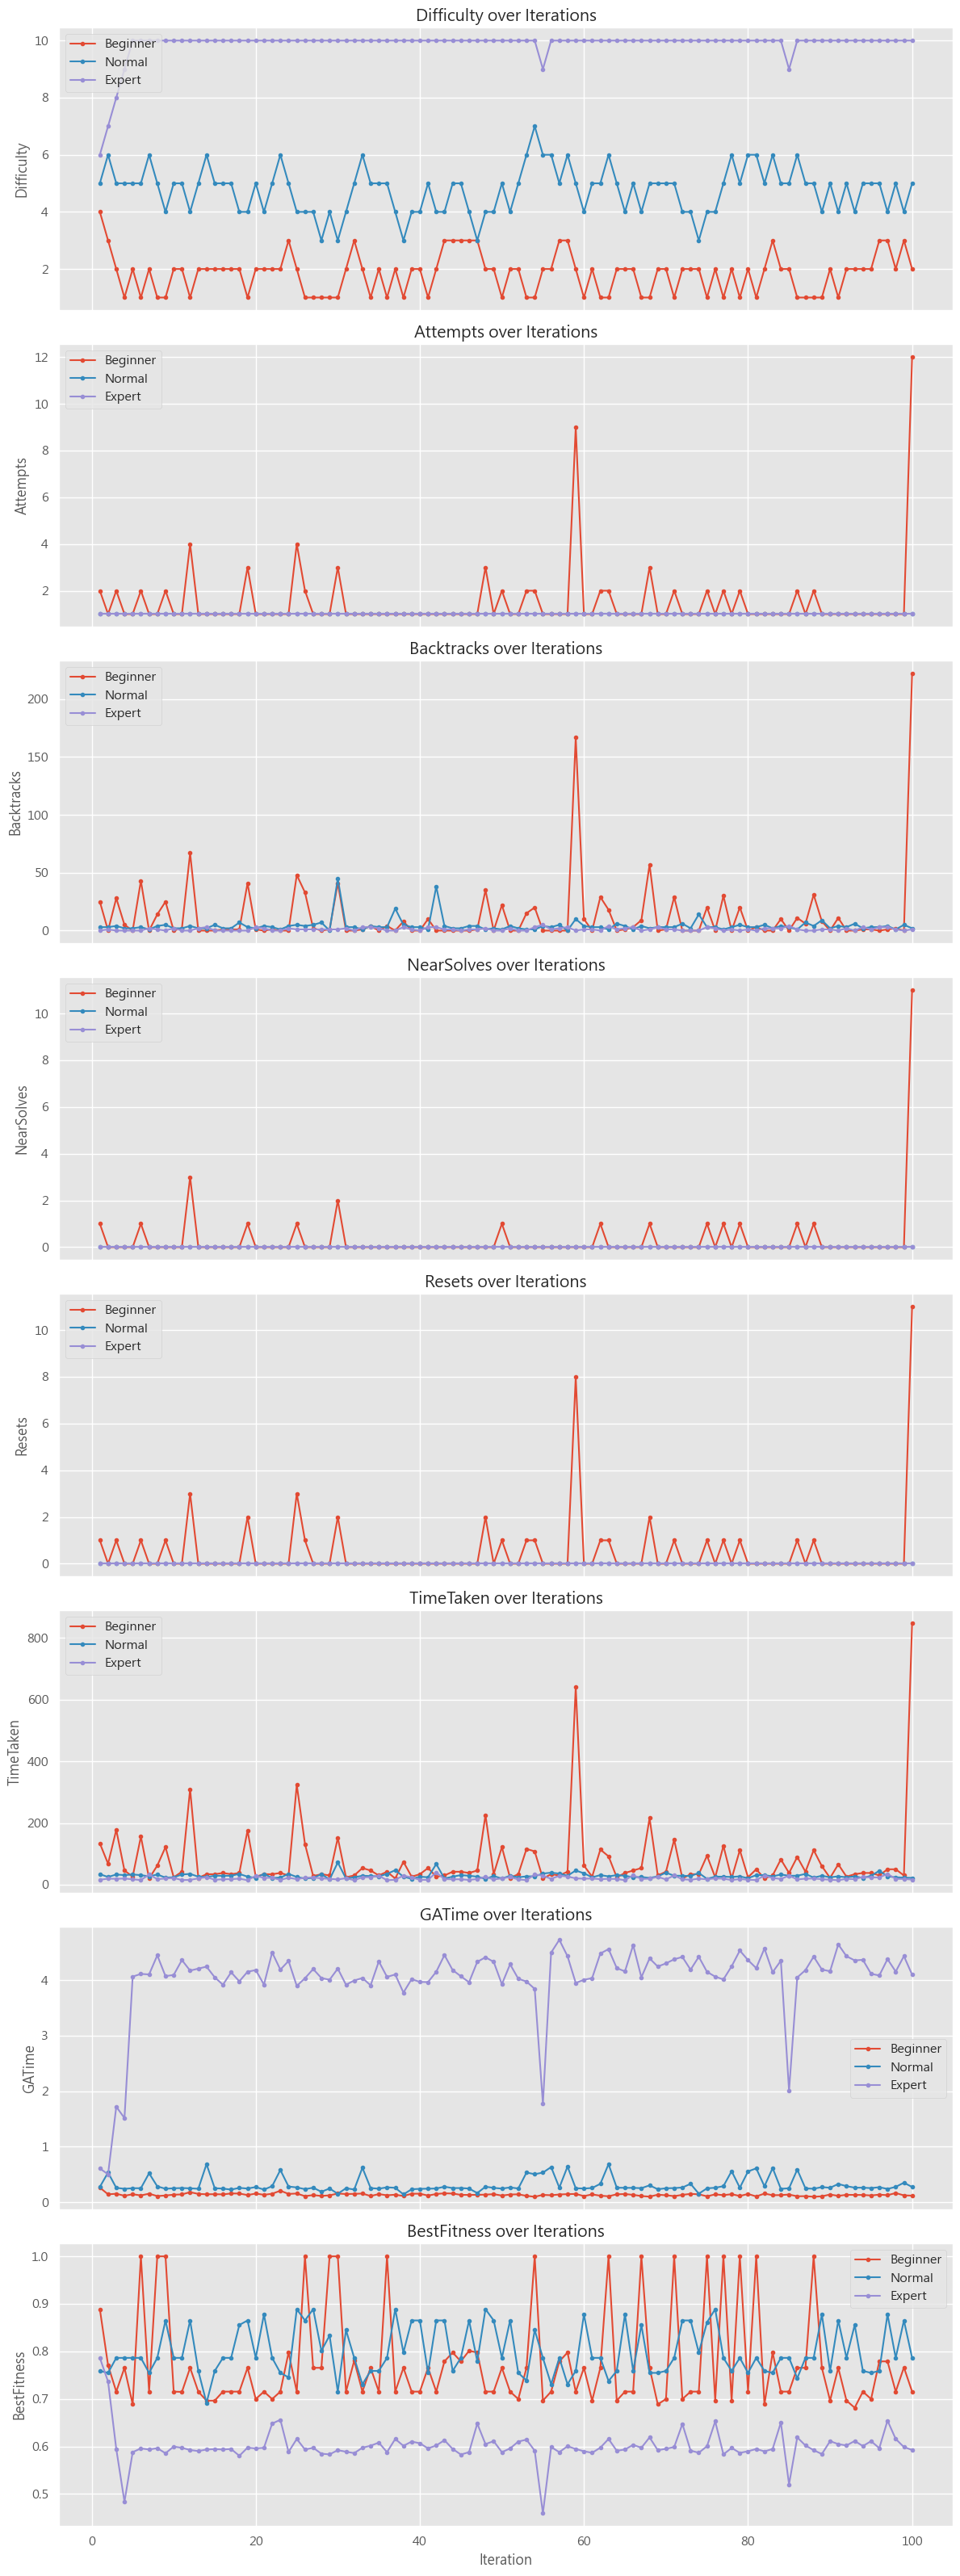

In [103]:
metrics = [
        'Difficulty', 'Attempts', 'Backtracks', 'NearSolves', 
        'Resets', 'TimeTaken', 'GATime', 'BestFitness'
    ]
    
fig, axes = plt.subplots(len(metrics), 1, figsize=(12, 4 * len(metrics)), sharex=True)
    
if len(metrics) == 1:
    axes = [axes]
    
for i, metric in enumerate(metrics):
    ax = axes[i]
    for agent_name, df in df_standard.items():
        if metric in df.columns:
            ax.plot(df['Iteration'], df[metric], label=agent_name, marker='o', markersize=3)
        
    ax.set_ylabel(metric)
    ax.set_title(f'{metric} over Iterations')
    ax.legend()
    ax.grid(True)
        
plt.xlabel('Iteration')
plt.tight_layout()
plt.show()

In [104]:
for agent_name, df in data.items():
    if 'Difficulty' in df.columns:
        avg_difficulty = df['Difficulty'].mean()
        print(f"{agent_name} - Final Average Difficulty: {avg_difficulty:.2f}")

Beginner - Final Average Difficulty: 1.83
Normal - Final Average Difficulty: 4.76
Expert - Final Average Difficulty: 9.88
Beginner-Time - Final Average Difficulty: 1.70
Normal-Time - Final Average Difficulty: 8.16
Expert-Time - Final Average Difficulty: 9.90
Beginner-NoModel - Final Average Difficulty: 5.00
Normal-NoModel - Final Average Difficulty: 5.00
Expert-NoModel - Final Average Difficulty: 5.00


In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

# 設定繪圖風格
sns.set_theme(style="whitegrid")
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'Microsoft JhengHei'] # 確保中文顯示正常
plt.rcParams['axes.unicode_minus'] = False

def parse_game_logs(files_dict):
    all_data = []

    for label, filepath in files_dict.items():
        # 解析標籤，例如 "Beginner-Time" -> Agent: Beginner, Mode: Time
        if "-" in label:
            agent, mode = label.split("-")
        else:
            agent, mode = label, "Standard"
        
        # 修正 NoModel 的命名 (如果你檔案命名邏輯不同，請在此調整)
        if mode == "NoModel":
            mode = "Linear/NoModel"
            
        if not os.path.exists(filepath):
            print(f"Warning: File not found {filepath}")
            continue

        with open(filepath, 'r', encoding='utf-8') as f:
            lines = f.readlines()

        for line in lines:
            line = line.strip()
            # 略過地圖數據 (# 開頭) 和空行
            if not line or line.startswith("#"):
                continue
            
            # 判斷是否為數據行 (以數字開頭)
            # 假設 CSV 格式: Iteration, Difficulty, Attempts, Backtracks, NearSolves, Resets, TimeTaken, GATime, BestFitness
            parts = line.split(',')
            if len(parts) >= 7 and parts[0].isdigit():
                try:
                    record = {
                        "Agent": agent,
                        "Mode": mode,
                        "Iteration": int(parts[0]),
                        "Difficulty": int(parts[1]),
                        "Attempts": int(parts[2]),
                        "Backtracks": int(parts[3]),
                        "NearSolves": int(parts[4]),
                        "Resets": int(parts[5]),
                        "TimeTaken": float(parts[6]),
                        # GATime 和 BestFitness 可能不存在於某些舊 log，做個容錯
                        "GATime": float(parts[7]) if len(parts) > 7 else 0,
                        "BestFitness": float(parts[8]) if len(parts) > 8 else 0
                    }
                    all_data.append(record)
                except ValueError:
                    continue
                    
    return pd.DataFrame(all_data)

df = parse_game_logs(files)
print(df.head())


      Agent      Mode  Iteration  Difficulty  Attempts  Backtracks  \
0  Beginner  Standard          1           4         2          25   
1  Beginner  Standard          2           3         1           0   
2  Beginner  Standard          3           2         2          28   
3  Beginner  Standard          4           1         1           5   
4  Beginner  Standard          5           2         1           0   

   NearSolves  Resets  TimeTaken  GATime  BestFitness  
0           1       1      134.0   0.263     0.888889  
1           0       0       68.0   0.142     0.770833  
2           0       1      178.0   0.152     0.715368  
3           0       0       46.0   0.116     0.765432  
4           0       0       26.0   0.143     0.688581  


C:\Users\senba\AppData\Local\Temp\ipykernel_32480\369765286.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=beginner_df, x="Mode", y="Attempts", ax=axes[0],
C:\Users\senba\AppData\Local\Temp\ipykernel_32480\369765286.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=beginner_df, x="Mode", y="Attempts", ax=axes[0],
C:\Users\senba\AppData\Local\Temp\ipykernel_32480\369765286.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=beginner_df, x="Mode", y="Resets", ax=axes[1],
C:\Users\senba\AppData\Local\Temp\ipykernel_32480\369765286.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` fo

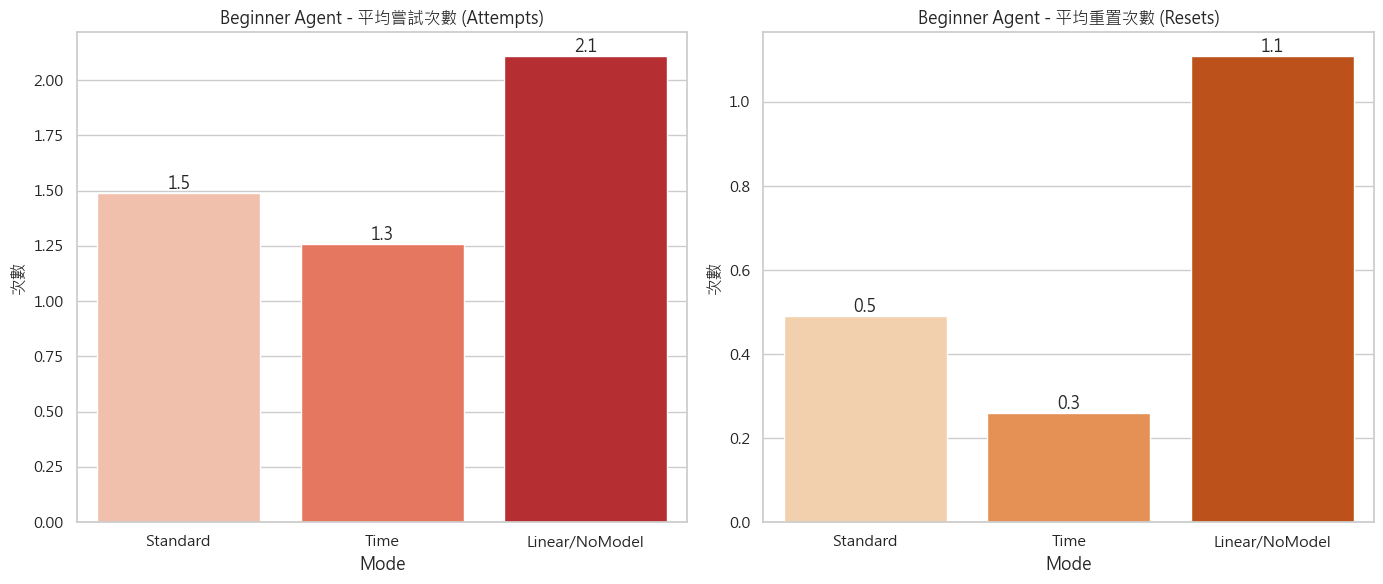

ANOVA F = 8.040405030671408
p = 0.00039751184227947275


In [106]:
import scipy.stats as stats

beginner_df = df[df['Agent'] == 'Beginner']

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Attempts
sns.barplot(data=beginner_df, x="Mode", y="Attempts", ax=axes[0],
            palette="Reds", ci=None)
axes[0].set_title("Beginner Agent - 平均嘗試次數 (Attempts)")
axes[0].set_ylabel("次數")
for c in axes[0].containers:
    axes[0].bar_label(c, fmt="%.1f")

# Resets
sns.barplot(data=beginner_df, x="Mode", y="Resets", ax=axes[1],
            palette="Oranges", ci=None)
axes[1].set_title("Beginner Agent - 平均重置次數 (Resets)")
axes[1].set_ylabel("次數")
for c in axes[1].containers:
    axes[1].bar_label(c, fmt="%.1f")

plt.tight_layout()
plt.show()

groups = [
    g["Attempts"].values
    for _, g in beginner_df.groupby("Mode")
]

f_value, p_value = stats.f_oneway(*groups)

print("ANOVA F =", f_value)
print("p =", p_value)

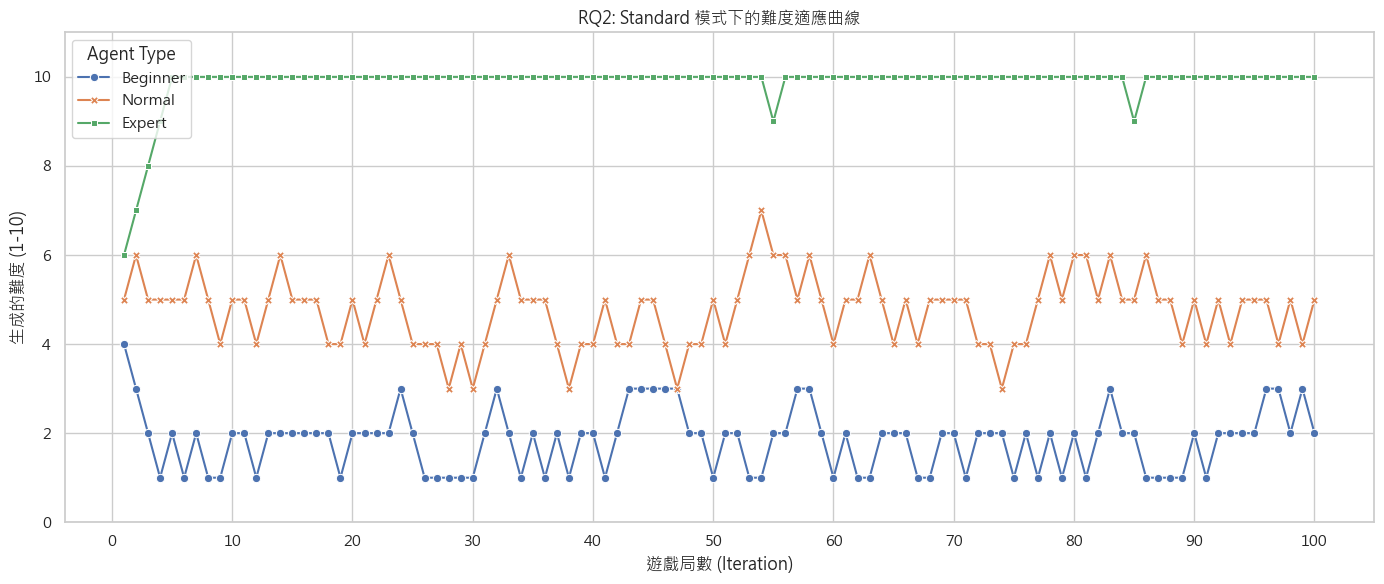

In [107]:
std_df = df[df['Mode'] == 'Standard']

plt.figure(figsize=(14, 6))
sns.lineplot(data=std_df, x="Iteration", y="Difficulty", 
             hue="Agent", style="Agent", markers=True, dashes=False)

plt.title("RQ2: Standard 模式下的難度適應曲線")
plt.ylabel("生成的難度 (1-10)")
plt.xlabel("遊戲局數 (Iteration)")
plt.ylim(0, 11)

plt.xticks(range(0, std_df["Iteration"].max()+1, 10))

plt.legend(title="Agent Type")
plt.tight_layout()
plt.show()


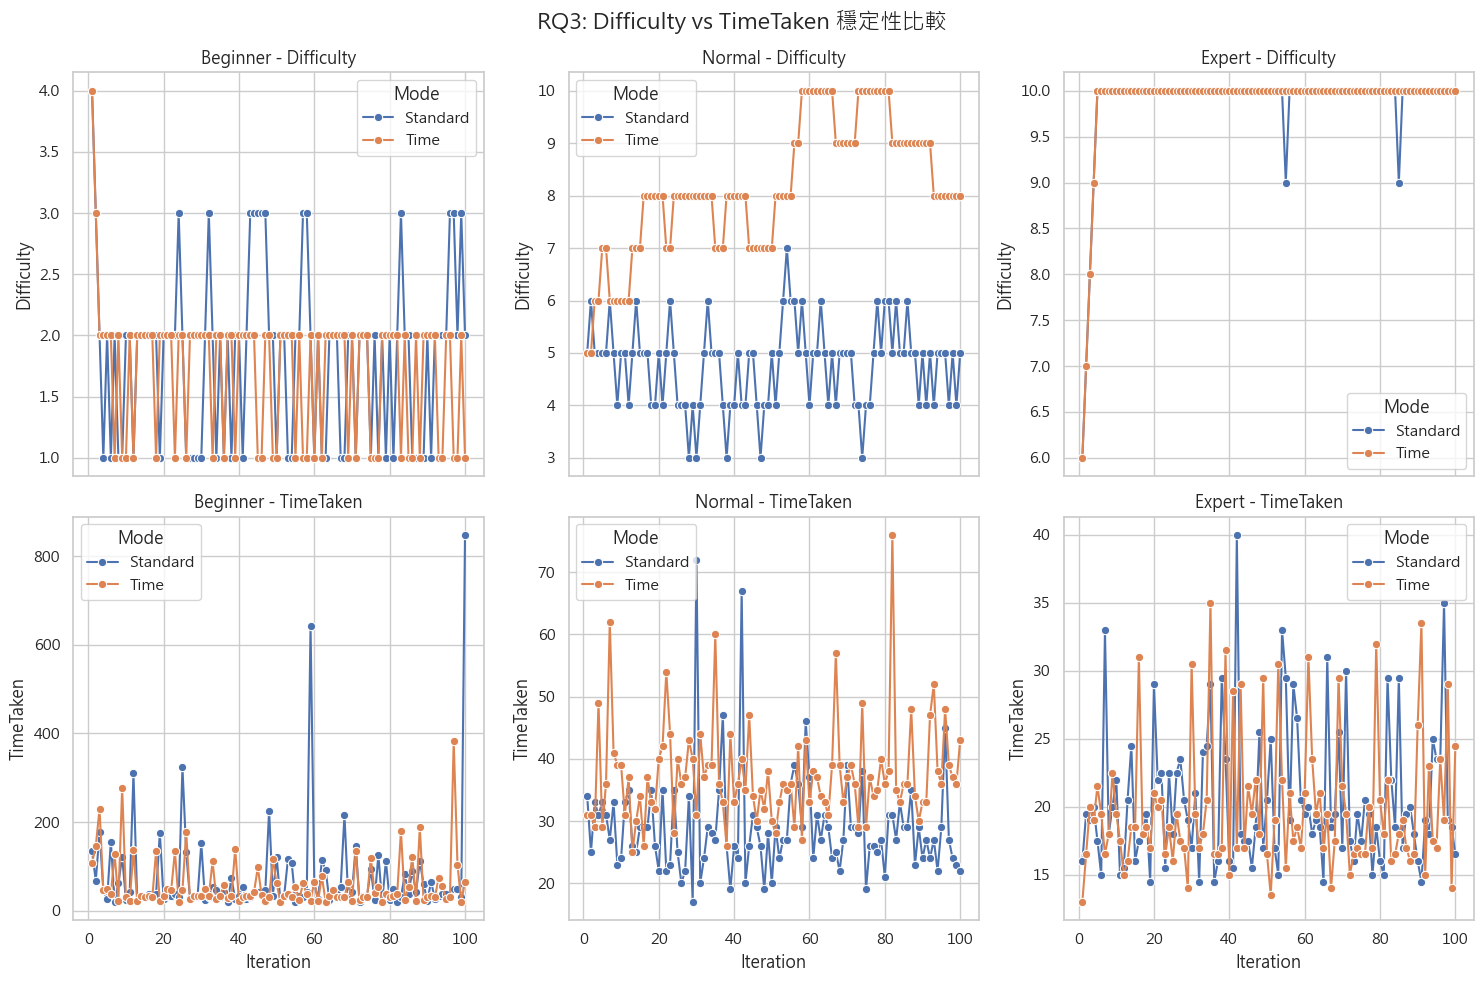

=== 平均 TimeTaken ===
      Agent      Mode  TimeTaken
0  Beginner  Standard      76.48
1  Beginner      Time      60.42
2    Expert  Standard      20.54
3    Expert      Time      19.93
4    Normal  Standard      28.97
5    Normal      Time      37.46


In [108]:
comp_df = df[df['Mode'].isin(['Standard', 'Time'])]

agents = comp_df['Agent'].unique()
n_agents = len(agents)

fig, axes = plt.subplots(2, n_agents, figsize=(5*n_agents, 10), sharex='col')

# 如果只有一個 Agent，需要把 axes 當成 2x1 的 list
if n_agents == 1:
    axes = np.array([axes]).reshape(2, 1)

# --- 上面 Difficulty ---
for i, agent in enumerate(agents):
    ax = axes[0, i]
    sns.lineplot(data=comp_df[comp_df['Agent'] == agent],
                 x="Iteration", y="Difficulty", hue="Mode",
                 marker="o", ax=ax)
    ax.set_title(f"{agent} - Difficulty")
    ax.legend().set_title("Mode")

# --- 下面 TimeTaken ---
for i, agent in enumerate(agents):
    ax = axes[1, i]
    sns.lineplot(data=comp_df[comp_df['Agent'] == agent],
                 x="Iteration", y="TimeTaken", hue="Mode",
                 marker="o", ax=ax)
    ax.set_title(f"{agent} - TimeTaken")
    ax.legend().set_title("Mode")

fig.suptitle("RQ3: Difficulty vs TimeTaken 穩定性比較", fontsize=16, y=0.98)
plt.tight_layout()
plt.show()

avg_time = comp_df.groupby(['Agent', 'Mode'])['TimeTaken'].mean().reset_index()
print("=== 平均 TimeTaken ===")
print(avg_time)


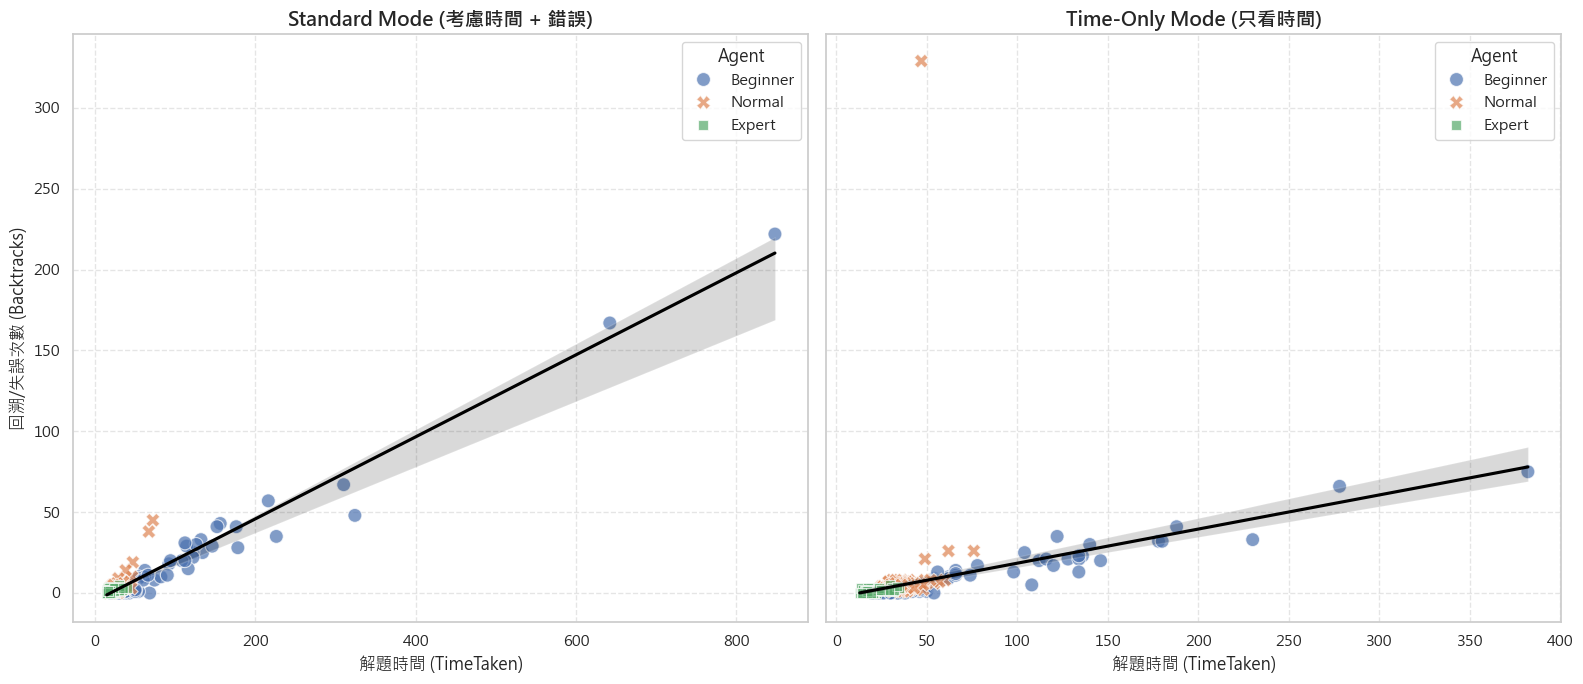

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(16, 7), sharey=True)

sns.scatterplot(
    data=df[df['Mode'] == 'Standard'], 
    x="TimeTaken", 
    y="Backtracks", 
    hue="Agent", 
    style="Agent",
    s=100,
    alpha=0.7,
    palette="deep",
    ax=axes[0]
)
sns.regplot(
    data=df[df['Mode'] == 'Standard'],
    x="TimeTaken",
    y="Backtracks",
    scatter=False,
    ax=axes[0],
    color="black"
)
axes[0].set_title("Standard Mode (考慮時間 + 錯誤)", fontsize=14, fontweight='bold')
axes[0].set_xlabel("解題時間 (TimeTaken)")
axes[0].set_ylabel("回溯/失誤次數 (Backtracks)")
axes[0].grid(True, linestyle='--', alpha=0.5)

sns.scatterplot(
    data=df[df['Mode'] == 'Time'], 
    x="TimeTaken", 
    y="Backtracks", 
    hue="Agent", 
    style="Agent",
    s=100,
    alpha=0.7,
    palette="deep",
    ax=axes[1]
)
sns.regplot(
    data=df[df['Mode'] == 'Time'],
    x="TimeTaken",
    y="Backtracks",
    scatter=False,
    ax=axes[1],
    color="black"
)
axes[1].set_title("Time-Only Mode (只看時間)", fontsize=14, fontweight='bold')
axes[1].set_xlabel("解題時間 (TimeTaken)")
axes[1].set_ylabel("")
axes[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

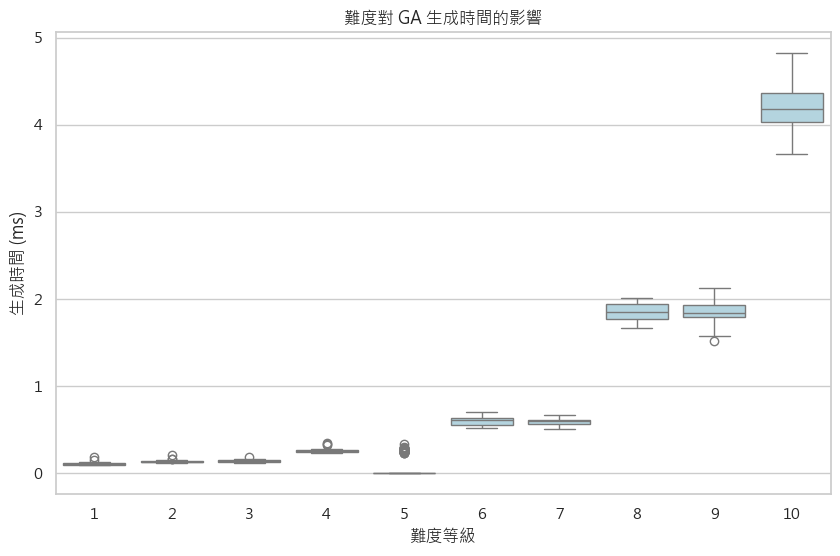

In [111]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Difficulty", y="GATime", color="lightblue")
plt.title("難度對 GA 生成時間的影響")
plt.xlabel("難度等級")
plt.ylabel("生成時間 (ms)")
plt.show()

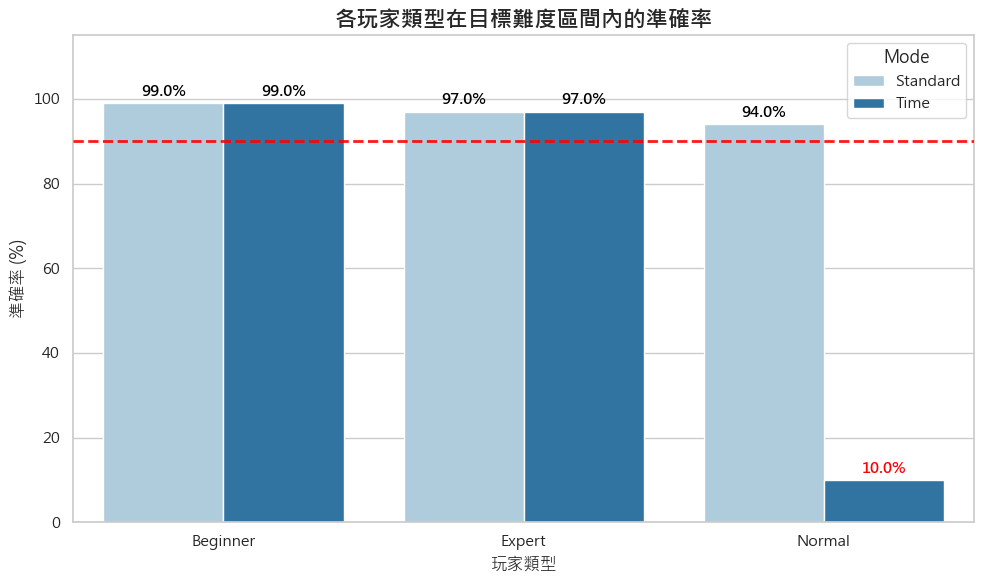

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcParams['font.family'] = 'Microsoft JhengHei'

df_clean = df[~df['Mode'].str.contains('NoModel', case=False, na=False)].copy()

cond_expert = (df_clean['Agent'] == 'Expert') & (df_clean['Difficulty'] >= 9)
cond_normal = (df_clean['Agent'] == 'Normal') & (df_clean['Difficulty'] >= 4) & (df_clean['Difficulty'] <= 6)
cond_beginner = (df_clean['Agent'] == 'Beginner') & (df_clean['Difficulty'] <= 3)

df_clean['InTargetZone'] = 0
df_clean.loc[cond_expert | cond_normal | cond_beginner, 'InTargetZone'] = 1

accuracy_df = df_clean.groupby(['Mode', 'Agent'])['InTargetZone'].mean().reset_index()
accuracy_df['Accuracy'] = accuracy_df['InTargetZone'] * 100

plt.figure(figsize=(10, 6))

barplot = sns.barplot(
    data=accuracy_df,
    x="Agent",
    y="Accuracy",
    hue="Mode",
    palette="Paired",
    zorder=1
)

for p in barplot.patches:
    if p.get_height() > 0:
        color = 'red' if p.get_height() < 90 else 'black'
        barplot.annotate(
            f'{p.get_height():.1f}%',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center',
            va='center',
            xytext=(0, 8),
            textcoords='offset points',
            fontsize=11,
            fontweight='bold',
            color=color
        )

plt.title("各玩家類型在目標難度區間內的準確率", fontsize=16, fontweight='bold')
plt.ylabel("準確率 (%)", fontsize=12)
plt.xlabel("玩家類型", fontsize=12)

plt.ylim(0, 115)

plt.axhline(y=90, color='red', linestyle='--', linewidth=2, alpha=0.9, zorder=5)

plt.tight_layout()
plt.show()